In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

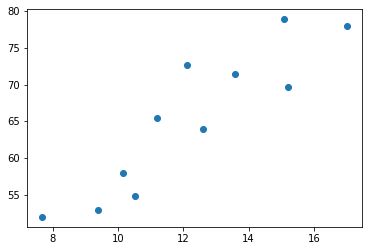

In [2]:
x_data=[7.68,	9.4,	10.15,	10.51,	11.21,	12.1,	12.6,	13.6,	15.1,	15.2,	17]
y_data=[52,	53,	58,	54.89,	65.46,	72.7,	64,	71.5,	78.9,	69.7,	78]

plt.scatter(x_data,y_data)
plt.show()

In [3]:
def forward(x):
  return x*w+b

def loss(x,y):
  y_pred=forward(x)
  return (y_pred-y)**2

def gradient_w(x,y):
  return 2*x*(x*w+b-y)

def gradient_b(x,y):
  return 2*(x*w+b-y)


In [4]:
w_init=1
b=0
rl=0.001
w=w_init
for epoch in range(100):
  l=0
  for x_val,y_val in zip(x_data,y_data):
    grad_w = gradient_w(x_val,y_val)
    w=w-rl*grad_w
    grad_b = gradient_b(x_val,y_val)
    b=b-rl*grad_b
    l=l+loss(x_val, y_val)
  mse=l/len(x_data)
  print("progress:", epoch, "w=", w, "mse=", mse)
w_last=w

progress: 0 w= 4.681793600941943 mse= 376.88555087306764
progress: 1 w= 4.724974424629168 mse= 32.98437084665576
progress: 2 w= 4.723154954511982 mse= 31.4416024959839
progress: 3 w= 4.72078183670626 mse= 31.360676904844187
progress: 4 w= 4.718404794211958 mse= 31.297550226058032
progress: 5 w= 4.716030622498594 mse= 31.234808540883137
progress: 6 w= 4.713659401984007 mse= 31.17223639461431
progress: 7 w= 4.711291130037199 mse= 31.109830703017327
progress: 8 w= 4.708925803004513 mse= 31.047591006099683
progress: 9 w= 4.706563417224148 mse= 30.985516877348633
progress: 10 w= 4.704203969038695 mse= 30.923607891727546
progress: 11 w= 4.701847454795299 mse= 30.86186362527803
progress: 12 w= 4.69949387084564 mse= 30.800283655111922
progress: 13 w= 4.697143213545938 mse= 30.738867559409343
progress: 14 w= 4.694795479256942 mse= 30.677614917415212
progress: 15 w= 4.692450664343928 mse= 30.616525309437147
progress: 16 w= 4.690108765176693 mse= 30.555598316842477
progress: 17 w= 4.6877697781295

## Draw the cost graph for my dataset

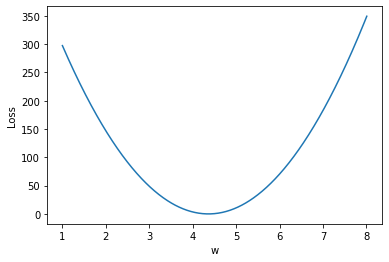

In [5]:
w_list=[]
mse_list=[]
for w in np.arange(w_init,w_last+abs(w_init-w_last),0.01):
  l_sum=0
  for x_val,y_val in zip(x_data,y_data):
    y_pred_val=forward(x_val)
    l=loss(x_val,y_val)
    l_sum+=l
  mse=l/len(x_data)
  w_list.append(w)
  mse_list.append(mse)
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()


### Exercise 3-1 : compute gradient and implement


$\hat{y}=x^2w_2+xw_1+b$

$loss=(\hat{y}-y)^2$

$\frac{\partial loss}{\partial w_1} = 2x(x^2w_2+xw_1+b-y)$

$\frac{\partial loss}{\partial w_2} = 2x^2(x^2w_2+xw_1+b-y)$

In [6]:
def forward(x):
  return (x**2)*w2+x*w1+b

def loss(x,y):
  y_pred=forward(x)
  return (y_pred-y)**2

def gradient_w1(x,y):
  return 2*x*((x**2)*w2+x*w1+b-y)

def gradient_w2(x,y):
  return 2*(x**2)*((x**2)*w2+x*w1+b-y)

def gradient_b(x,y):
  return 2*((x**2)*w2+x*w1+b-y)

In [7]:
x_data=[1,2,3]
y_data=[1,4,9]

In [8]:
w1_init=0
w2_init=0
b=0
rl=0.01
w1=w1_init
w2=w2_init
print("predict (before training)", 4, forward(4))
for epoch in range(100):
  l=0
  for x_val,y_val in zip(x_data,y_data):
    grad_w1 = gradient_w1(x_val,y_val)
    w1=w1-rl*grad_w1
    
    grad_w2 = gradient_w2(x_val,y_val)
    w2=w2-rl*grad_w2
    
    grad_b = gradient_b(x_val,y_val)
    b=b-rl*grad_b
    l=l+loss(x_val, y_val)
  mse=l/len(x_data)
  print("progress:", epoch, "w1=", w1, "w2=", w2,"mse=", mse)
print("predict (after training)", 4, forward(4))


predict (before training) 4 0
progress: 0 w1= 0.51494349502976 w2= 1.1413736761732096 mse= 4.828439343403701
progress: 1 w1= 0.35386122896165295 w2= 0.802365656066029 mse= 0.5929006152751471
progress: 2 w1= 0.3957702804020494 w2= 0.9071366011821413 mse= 0.04574521546736183
progress: 3 w1= 0.3770737415139017 w2= 0.8787056235365593 mse= 0.04116087656882072
progress: 4 w1= 0.3768039212536082 w2= 0.8900938005473946 mse= 0.024978588485791608
progress: 5 w1= 0.3712514268542161 w2= 0.8894234359878183 mse= 0.02536465575623387
progress: 6 w1= 0.3675158297572231 w2= 0.8922556591153588 mse= 0.02240188584313861
progress: 7 w1= 0.3634586171060323 w2= 0.8939289250415675 mse= 0.02073680840399949
progress: 8 w1= 0.3597118409814834 w2= 0.8958455469068148 mse= 0.01891886839467349
progress: 9 w1= 0.35607714100316284 w2= 0.8975893203770191 mse= 0.017339258667312965
progress: 10 w1= 0.35260553196440375 w2= 0.8992891715622375 mse= 0.01586873555468975
progress: 11 w1= 0.349273599405126 w2= 0.9009103915270225